# Lecture 5 - Image Morphing

<br>

<b>Image morphing is the process of gradually converting one image into another</b><br><br>
    
<b>This process has been used in the past two decades in the entertainment industry, but it is also very useful in image classification algorithms</b><br><br>

<b>There are two processes used here in the morphing</b><br><br>

<b>The first is an image <b>warp</b> which smoothly transitions one image to a specified grid</b><br><br>

<b>The second is the <b>morph</b> which uses the warp to gradually transition one image into another</b><br><br>

<b>The warp process requires that the user mark several anchor points (fiducial points) in the image</b><br><br>

<b>Generally, these are located at the edges and corners of major features</b><br><br>

<b>A large number of fiducial points will create a better warp result but also increase the computational cost</b><br><br>

<br><br><br><br>

## Warp

<br>

<b>There are a few steps required to warp an image</b><br><br>

<b>First, fiducial points in the image are identified</b><br><br>

<b>The process will require the grid for the image and a second grid which is the target for warping</b><br><br>

<b>Points in the image will move from locations in the first grid to locations in the second grid</b><br><br>

<b>The grid defines a lattice structure which is created by Delaunay tessellation</b><br><br>

<b>Finally, all of the components are in place and the warping process can be applied</b><br><br>

<br><br>

### Marking Fiducial Points

<br>

<b>Fiducial points or landmarks are the anchor points within an image that guide the warp</b><br><br>

<b>The fiducial points are located at important features such as corners and edges</b><br><br>

<b>These fiducial points are the nodes in the lattice structure</b><br><br>

<b>In facial recognition algorithms, fiducial points are commonly located about the perimeter of the eyes, nose, and mouth </b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lecture_6_7_8_9/P2im3.png?raw=true" width="300"/img></div>
<br><br>

<b>Automated facial recognization is a continuing area of reserach in deep learning</b><br><br>

<b>A simple literature research will show the current state</b><br><br>

<br><br>

### Finding Fiducial Landmarks

<br>

<b>Detecting facial landmarks is a two step process:</b><br><br>

<b>
* Step #1: Localize the face in the image<br><br>
* Step #2: Detect the key facial structures on the face ROI<br><br>
</b>

<b>Face detection (Step #1) can be achieved in a number of ways</b><br><br>

<b>One could use OpenCV’s built-in Haar Cascades</b><br><br>

<b>Or we might even use deep learning-based algorithms for face localization</b><br><br>

<b>The actual algorithm used to detect the face in the image doesn’t matter</b><br><br>

<b>Instead, what’s important is that through some method we obtain the face bounding box (i.e., the (x, y)-coordinates of the face in the image)</b><br><br>

<b>Given the face region we can then apply Step #2: detecting key facial structures in the face region</b><br><br>

<b>There are a variety of facial landmark detectors, but all methods essentially try to localize and label the following facial regions:</b>

* Mouth
* Right eyebrow
* Left eyebrow
* Right eye
* Left eye
* Nose
* Jaw

<br><br>

<b>The facial landmark detector included in the dlib library is an implementation of the One Millisecond Face Alignment with an Ensemble of Regression Trees paper by Kazemi and Sullivan (2014)</b><br><br>

<b>This method starts by using:</b><br><br>

* A training set of labeled facial landmarks on an image. These images are manually labeled, specifying specific (x, y)-coordinates of regions surrounding each facial structure
    
* Priors or more specifically, the probability on distance between pairs of input pixels

<b>Given the training data, an ensemble of regression trees are trained to estimate the facial landmark positions directly from the pixel intensities themselves (i.e., no “feature extraction” is taking place)</b><br><br>
    
<b>The end result is a facial landmark detector that can be used to detect facial fiducial point in real-time with high quality predictions</b><br><br>

<br><br>

### dlib’s facial landmark detector

<b>The pre-trained facial landmark detector inside the dlib library is used to estimate the location of 68 (x, y)-coordinates that map to facial structures on the face</b><br><br>
    
<b>The indexes of the 68 coordinates can be visualized on the image below:</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lecture_6_7_8_9/P2im4.png?raw=true" width="400"/img></div>
<br><br>

<b>These annotations are part of the 68 point iBUG 300-W dataset which the dlib facial landmark predictor was trained on (https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/)</b><br><br>

<br><br>

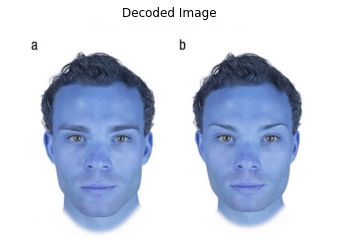

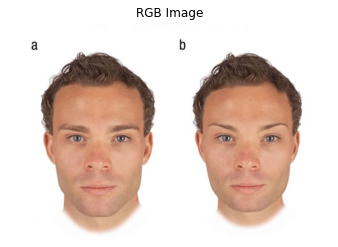

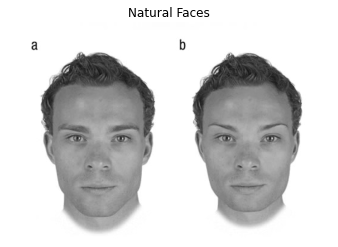

Faces Locations:
 [[ 48 112 207 207]
 [306 123 192 192]]


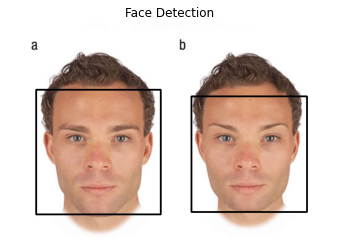

In [2]:
#  facial detection example
%matplotlib inline
import matplotlib.pyplot as plt  # used to plot our images
import cv2  # opencv 4.1.2 to read images
import urllib.request as urlreq
import numpy as np

# read image with openCV
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/masc_fem.jpg'
s = urlreq.urlopen(url)
img_array = np.array(bytearray(s.read()), dtype=np.uint8)

#  cv2.imdecode() function reads data from specified memory cache and converts (decodes) data into image format
image = cv2.imdecode(img_array, -1)

# plot image with matplotlib package
plt.axis('off')
plt.title('Decoded Image')
plt.imshow(image, cmap='gray')
plt.show()

####  image process the image
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.axis('off')
plt.title('RGB Image')
plt.imshow(image_rgb)
plt.show()

# create a copy of the image to be used later
image_template = image_rgb.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis('off')
plt.title('Natural Faces')
plt.imshow(image_gray, cmap='gray')
plt.show()

# create an instance of the Face Detection Cascade Classifier
#  https://github.com/opencv/opencv/tree/master/data/haarcascades
ppath = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/Fall_2023/Lectures/Lecture_2_3_4_5/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(ppath)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)

# Print coordinates of detected faces
print('Faces Locations:\n', faces)

for face in faces:
#  save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
# Draw a black colored rectangle around each face using the face's coordinates
#   on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(0, 0, 0), 2)

plt.axis('off')
plt.title('Face Detection')
plt.imshow(image_template)
plt.show()

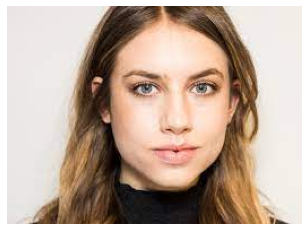


Heigth and width of image: 193 261


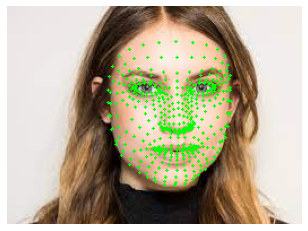

In [3]:
# https://google.github.io/mediapipe/solutions/solutions.html

%matplotlib inline
import matplotlib.pyplot as plt  # used to plot our images
import cv2
import mediapipe as mp

# read image with openCV
basePath = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/GGS681_Social_Media_Analysis/NGA/Fall_2022/Data/'
image = cv2.imread(basePath + 'Example_Face.png')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #  fix the colors

plt.axis("off")
plt.imshow(rgb_image)
plt.show()

# Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh() # https://google.github.io/mediapipe/solutions/face_mesh.html

# Facial landmarks
result = face_mesh.process(rgb_image)

height, width, _ = rgb_image.shape
print('\nHeigth and width of image:', height, width)

for facial_landmarks in result.multi_face_landmarks:
    for i in range(0, 468):  # https://google.github.io/mediapipe/solutions/face_mesh.html
        pt1 = facial_landmarks.landmark[i]
        x = int(pt1.x * width)
        y = int(pt1.y * height)
        cv2.circle(rgb_image, (x, y), 1, (0, 255, 0), -1)
        
plt.axis("off")
plt.imshow(rgb_image)
plt.show()

<br><br><br><br>

## Delaunay Tessellation

<br>

<b>Delaunay tessellation produces a set of triangles</b><br><br>

<b>The intersections of the triangles are the fiducial points, and the  triangles have the following conditions</b>

* Edges of the triangles do not cross other edges
* A circle that connects three points of a triangle will not contain other points from other triangles
* Acute angles are avoided

<br><br>

<b>The scipy.spatial module offers the Delaunay object</b><br><br>

<br><br>

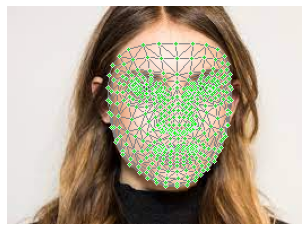

In [4]:
#  Delaunay Tessellation
import cv2
import mediapipe as mp
from PIL import Image

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

drawing_spec = mp_drawing.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1)

# Create a face mesh object
with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

    # Read image file with cv2 and process with face_mesh
    basePath = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/GGS681_Social_Media_Analysis/NGA/Fall_2022/Data/'
    image = cv2.imread(basePath + 'Example_Face.png')
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Define boolean corresponding to whether or not a face was detected in the image
face_found = bool(results.multi_face_landmarks)

if face_found:
    # Create a copy of the image
    annotated_image = image.copy()
    
    # Draw landmarks on face
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.multi_face_landmarks[0],
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
    # Save image
    cv2.imwrite('face_tesselation_only.png', annotated_image)

# Open image
img = Image.open('face_tesselation_only.png')
plt.axis("off")
plt.imshow(img)
plt.show()

<br><br><br><br>

### Warping

<br>

<b>The Warp operator moves pixels to new locations according the prescription defined by a fiducial grid $G$, as in,</b><br><br>

${\bf b}[\vec x] = W_G {\bf a}[\vec x]$ <br><br><br>

<b>The tessellation creates the triangles and can even identify the triangles in which a point is in</b><br><br>

<b>The fiducial points are the corners of the triangles and moving them from input space to output space is quite easy since the points are well defined in both spaces</b><br><br>

<b>The points that are interior to the triangle are not well defined in the output space</b><br><br>

<b>A method computes the distance from a point to the three corners</b><br><br>

<b>The ratios of these distances are used to compute the new points</b><br><br>

<b>The corners of a triangle are defined as: $\vec p_1$, $\vec p_2$, and $\vec p_3$.  Any point, $\vec p_4$, within a triangle is defined as a linear combination of the the corners as in,</b><br><br>

$\vec p_4 = \lambda_1 \vec p_1 + \lambda_2 \vec p_2 + \lambda_3 \vec p_3$

<b>where</b><br><br>

$\lambda_1 + \lambda_ 2 + \lambda_3 = 1$

<b>Determining the location of the point in the new space $T$ is performed through a linear transformation, </b><br><br>

$ \begin{bmatrix} \lambda_1 \\ \lambda_2 \end{bmatrix} = {\bf T}^{-1} (\vec p_4 - \vec p_3)$

<b>where</b><br><br>

$T = \begin{bmatrix}
  x_1 - x_3 & x_2 - x_3 \\
  y_1 - y_3 & y_2 - y_3 \end{bmatrix}$

<b>where $\lambda_3$ is defined as $\lambda_3 = 1 - \lambda_1 - \lambda_2$

<b>This process is repeated for all points using the appropriate triangles</b><br><br>

<b>Transformation of points that are outside of the face boundary is accomplished by adding four fiducial points for the corners of the image frame</b><br><br>

<b>Thus each point in the input image is within a triangle</b><br><br>

<br><br><br><br>


## Average Face

<br>

<b>The average face is a composite image created from the facial images of many people</b><br><br>

<b>The phrase "average" implies that the entities are summed and then the result is divided by the number of entities</b><br><br>

<b>Given a set of vectors $\lbrace \vec x_i; i=1,...,N \rbrace$ the average is usually computed by, $\frac{1}{N} \sum_{i=1} ^N \vec x_i$</b><br><br>

<b>In order to create a realistic average face it is necessary to align significant features such as the eyes, mouths, noses, etc</b><br><br>

<b>This is accomplished by aligning all of the faces to a single fiducial grid, $G$, before computing the average</b><br><br>

<b>Formally, the average face is</b><br><br>

$ {\bf b}[\vec x] = \frac{1}{N} \sum_i W_G {\bf a}_i [\vec x]  = \frac{1}{N} \sum \{ W_G {\bf a}[\vec x] \}$

<b>where ${\bf a}_i[\vec x]$ is the i-th face image and $ W_G$ is the warping operator that maps the image to an average fiducial grid $G$</b><br><br>

<br><br>

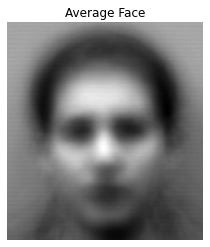

In [5]:
#  average face example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
from cv2 import imread

#  https://cmp.felk.cvut.cz/~spacelib/faces/faces94.html
dir = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/faces94/**/**.jpg'
files = list(glob.iglob(dir, recursive=True))
img = np.zeros(imread(files[0],0).shape)
img = img.astype('int')
for i in range(len(files)):
    img += imread(files[i],0).astype('uint8')

img = np.divide(img,len(files))
img = np.mod(img,256)
img = img.astype(np.uint8)

plt.axis('off')
plt.title('Average Face')
plt.imshow(img, cmap='gray')
plt.show()

<br><br><br><br><br><br><br><br>

# Homework 5

<br>
<b>
    
1. With the provided image (2faces.jpg), find the face location and  display the face with rectangles drawn on the face.<br><br>

2. Using the face location, crop the first face and display it and then save it to a file.<br><br>

3. With the saved image from #2, plot the landmark points in black on the face using mediapipe as I showed above.<br><br>

4. Display the Delaunay Tessellation in black on the face saved from #2 using mediapipe as I showed above.<br><br>

5. Repeat the average face example only using female faces and display the average face.<br><br>

6. Repeat the average face example only using male faces and display the average face.<br><br>

7. What differences do you see between the averaged female and male faces?<br><br>
</b>